In [280]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D,MaxPool2D,Dropout

In [281]:
from keras.utils import to_categorical

In [282]:
import numpy as np

In [283]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [284]:
from keras.datasets import cifar10

In [285]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [286]:
type(xtrain)

numpy.ndarray

In [287]:
xtrain.shape

(50000, 32, 32, 3)

In [288]:
xtrain[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

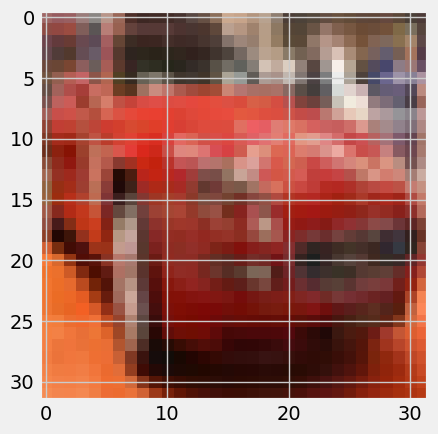

In [289]:
img0=plt.imshow(xtrain[5])

In [290]:
lab1=ytrain[5]
print(lab1)

[1]


In [291]:
classification = ['airplaine','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [292]:
print('image class is:',classification[ytrain[5][0]])

image class is: automobile


In [293]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [294]:
ytrain_one_hot[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [295]:
print('one hot label:',ytrain_one_hot[5])

one hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [296]:
xtrain=xtrain/255
xtest=xtest/255

In [297]:
xtrain[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [298]:
model=Sequential()

In [299]:
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

In [300]:
model.add(MaxPool2D(pool_size=(2,2)))

In [301]:
model.add(Conv2D(32,(5,5),activation='relu'))

In [302]:
model.add(MaxPool2D(pool_size=(2,2)))

In [303]:
model.add(Flatten())

In [304]:
model.add(Dense(1000,activation='relu'))

In [305]:
model.add(Dropout(0.5))

In [306]:
model.add(Dense(500,activation='relu'))

In [307]:
model.add(Dropout(0.5))

In [308]:
model.add(Dense(250,activation='relu'))

In [309]:
model.add(Dense(10,activation='softmax'))

In [310]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 1000)             

In [311]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [322]:
d_tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=15,validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 9s 58ms/step - loss: 1.4804 - accuracy: 0.4540 - val_loss: 1.3884 - val_accuracy: 0.4953
Epoch 2/15
157/157 [==============================] - 9s 59ms/step - loss: 1.3568 - accuracy: 0.5120 - val_loss: 1.3427 - val_accuracy: 0.5147
Epoch 3/15
157/157 [==============================] - 9s 59ms/step - loss: 1.2609 - accuracy: 0.5480 - val_loss: 1.2129 - val_accuracy: 0.5690
Epoch 4/15
157/157 [==============================] - 9s 59ms/step - loss: 1.1793 - accuracy: 0.5779 - val_loss: 1.1394 - val_accuracy: 0.5921
Epoch 5/15
157/157 [==============================] - 9s 60ms/step - loss: 1.1265 - accuracy: 0.5991 - val_loss: 1.1011 - val_accuracy: 0.6075
Epoch 6/15
157/157 [==============================] - 9s 59ms/step - loss: 1.0719 - accuracy: 0.6223 - val_loss: 1.1500 - val_accuracy: 0.5978
Epoch 7/15
157/157 [==============================] - 9s 60ms/step - loss: 1.0111 - accuracy: 0.6413 - val_loss: 1.0800 - val_accuracy: 0.6281

In [323]:
acc=model.evaluate(xtest,ytest_one_hot)
print('Accuracy score for the test data: ',acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.9563 - accuracy: 0.6773
Accuracy score for the test data:  [0.956295907497406, 0.677299976348877]


In [314]:
pic = plt.imread('1200.jpeg')

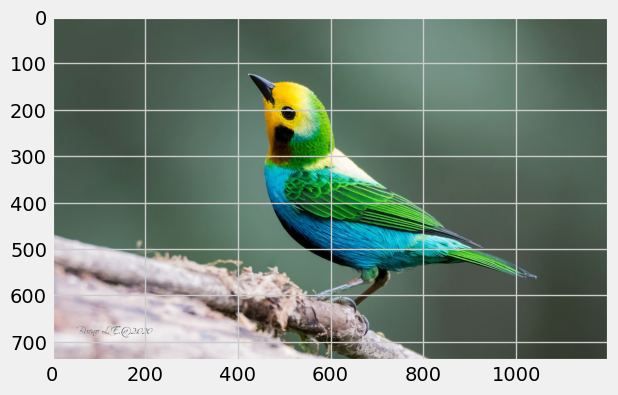

In [315]:
img=plt.imshow(pic)

In [316]:
from skimage import transform

In [317]:
resize=transform.resize(pic,(32,32,3))

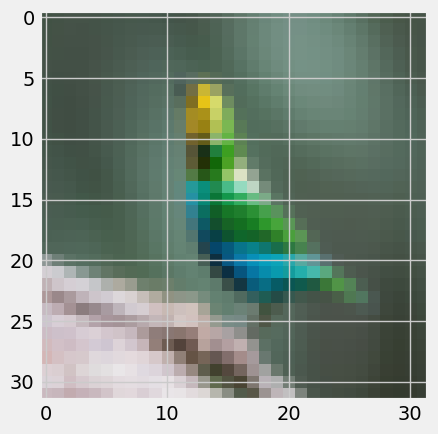

In [318]:
img = plt.imshow(resize)

In [319]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 46ms/step
[[0.0949439  0.0314953  0.22056513 0.15427549 0.14389424 0.09562664
  0.0964783  0.03690793 0.09425491 0.03155816]]


In [320]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[2, 3, 4, 6, 5, 0, 8, 7, 9, 1]


In [321]:
for i in range (1):
    print(classification[list_index[i]])

bird
